# Predicting House prices

# This script demonstrate a complete, simple machine learning workflow for predicting house prices using linear regression

## section 1

In [26]:
# Section 1: Import  Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

print("Libraries imported successfully")
print("*" * 50)



Libraries imported successfully
**************************************************


## section 2

In [27]:
#Section 2: Generate Synthetic Data(If no real dataset is available)
#Source of data in real project: csv or excel or text or database
#For my hands-on project, I create a random dataset to endure code runs...

num_houses = 100
# Number of data points/houses we want to generate 

size_sqft = np.random.rand(num_houses) * 2200 + 800
#Generate random square feet, e.g 800 to 3000 sqft
#np = numpy,random.rand() generates numbers between 0 and 1

num_bedrooms = np.random.randint(2,6,num_houses)
#randint generates integers
#generate number of bedrooms, e.g. 2 to 5 bedrooms

random_noise = np.random.randn(num_houses)* 30000
#Standard normal distribution * 30k
#Random noise makes the data more realistic(not perfectly linear)

#Formula to calculate price:
#price = (size_sqft * 100) + (num_bedrooms*20000) + random_noise

house_price_usd = (size_sqft * 100) + (num_bedrooms*20000) + random_noise

#Create Pandas DataFrame from the generated data
data = pd.DataFrame({
    'Size_sqft' : size_sqft,
    'Num_Bedrooms' : num_bedrooms,
    'Price_USD' : house_price_usd
})

print(f"Generated a synthetic dataset with {num_houses} entries")
print("First 10 rows of dataset")
print(data.head(10))
print("*" * 50)

Generated a synthetic dataset with 100 entries
First 10 rows of dataset
     Size_sqft  Num_Bedrooms      Price_USD
0  1718.984333             2  176548.547193
1  1978.936339             3  271588.940423
2  1924.627430             4  272804.798334
3  1784.940735             4  227178.701815
4  2658.872930             4  344350.346399
5  2639.247664             5  413776.318178
6  2862.466915             4  343070.265607
7  1191.458658             3  210609.608625
8  2549.933784             3  315289.083544
9  2688.016097             4  304732.577391
**************************************************


# section 3

In [28]:
#Section 3: Data Preparation - Defining Features (X) and (y)

X = data[['Size_sqft','Num_Bedrooms']]
#  select Size_sqft and number of bedrooms as  Features (input)

y = data['Price_USD']
# The price of the house is the target (output)

print("Features (X) shape:", X.shape)# Print shape of features DataFrame
print("Target (y) shape:", y.shape) # Print shape of target series
print("*" * 50)

Features (X) shape: (100, 2)
Target (y) shape: (100,)
**************************************************


# section 4

In [17]:
#Section 4: Data Preparation - Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Test Size is 20%, that is 80% for training the model
# random state endures reproducibility(get the same split every time code runs)
# train_test_split divides X and  y into training and testing sets

print(f"Data split into training and testing sets:")
print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Training features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Training target (y_test) shape: {y_test.shape}")
print("*" * 50)


Data split into training and testing sets:
Training features (X_train) shape: (80, 2)
Training features (X_test) shape: (20, 2)
Training target (y_train) shape: (80,)
Training target (y_test) shape: (20,)
**************************************************


# section 5

In [29]:
#Section 5: Model Building - Initialize Linear Regression Model 

model = LinearRegression()
#  create an instance of the linearRegression Model from Sci-kit learn
# This object will learn the relationship between features and target

print("Linear Regression Model Initialized!")
print("*" * 50)


Linear Regression Model Initialized!
**************************************************


# section 6

In [30]:
#Section 6: Model Training - Fitting the Model to the Data

print("Training the Linear Regression model...")
model.fit(X_train, y_train)
print("Model Training Complete!")

#  inspect the Learned coefficients and intercepts after training
print(f"Learned Coefficients (Slopes for Size_sqft, Num_Bedrooms): {model.coef_}")
print(f"Learned Intercept (Bias): {model.intercept_}")
print("*" * 50)


Training the Linear Regression model...
Model Training Complete!
Learned Coefficients (Slopes for Size_sqft, Num_Bedrooms): [   95.83988832 22858.73310986]
Learned Intercept (Bias): -1316.1710873665288
**************************************************


# section 7 

In [21]:
#Section 7: Model Prediction - Moking Forecasts on unseen data

print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions Made Successfully!")

print("\nFirst 10 Actual vs. Predicted Prices:")
for i in range(10):
    print(f"Actual: ${y_test.iloc[i]:,.2f} | Predicted: ${y_pred[i]:,.2f}")
print("*" * 50)

Making predictions on the test set...
Predictions Made Successfully!

First 10 Actual vs. Predicted Prices:
Actual: $189,559.88 | Predicted: $181,780.66
Actual: $168,340.03 | Predicted: $206,406.56
Actual: $208,603.17 | Predicted: $223,244.46
Actual: $351,816.92 | Predicted: $371,331.80
Actual: $190,268.18 | Predicted: $192,145.64
Actual: $223,043.92 | Predicted: $212,005.10
Actual: $286,041.70 | Predicted: $308,079.84
Actual: $189,480.77 | Predicted: $211,548.00
Actual: $186,594.93 | Predicted: $189,193.66
Actual: $330,111.15 | Predicted: $290,698.20
**************************************************


# section 8

In [22]:
#Section 8 - Model Evaluation - Assessing performance

# 8.1 Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:,.2f}")

# 8.2 R-Squared (R2 Scored)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:,.2f}")

if r2 > 0.7:
    print("\nGreat Job! The model explains a good portion of the variance in house prices")
else:
    print("\nGood start! There's always room for improvement... e.g. More features? Different model?")
print("*" * 50)


Mean Squared Error (MSE): 370,314,883.87
R-squared (R2 Score): 0.92

Great Job! The model explains a good portion of the variance in house prices
**************************************************


# Section 9

In [23]:
#Section 9 - Prediction on New, Custom Data (Real-World Application)

#Time to predict price of a new house
print("Predicting price of a new custom house:")
new_house_data = pd.DataFrame({
    'Size_sqft' : [1800, 2500, 1200], # Example: a 1800 sq ft, 2500 sq ft, 1200 sq ft house
    'Num_Bedrooms' : [3,4,2]          # Example: with 3, 4, 2 bedrooms respectively
})

predicted_new_prices = model.predict(new_house_data)

for i, (size, beds) in enumerate(zip(new_house_data['Size_sqft'], new_house_data['Num_Bedrooms'])):
    print(f"House Size: {size} sqft,Bedrooms: {beds} -> Predicted Price: ${predicted_new_prices[i]:,.2f}")
print("*" * 50)

Predicting price of a new custom house:
House Size: 1800 sqft,Bedrooms: 3 -> Predicted Price: $239,771.83
House Size: 2500 sqft,Bedrooms: 4 -> Predicted Price: $329,718.48
House Size: 1200 sqft,Bedrooms: 2 -> Predicted Price: $159,409.16
**************************************************


# Section 10

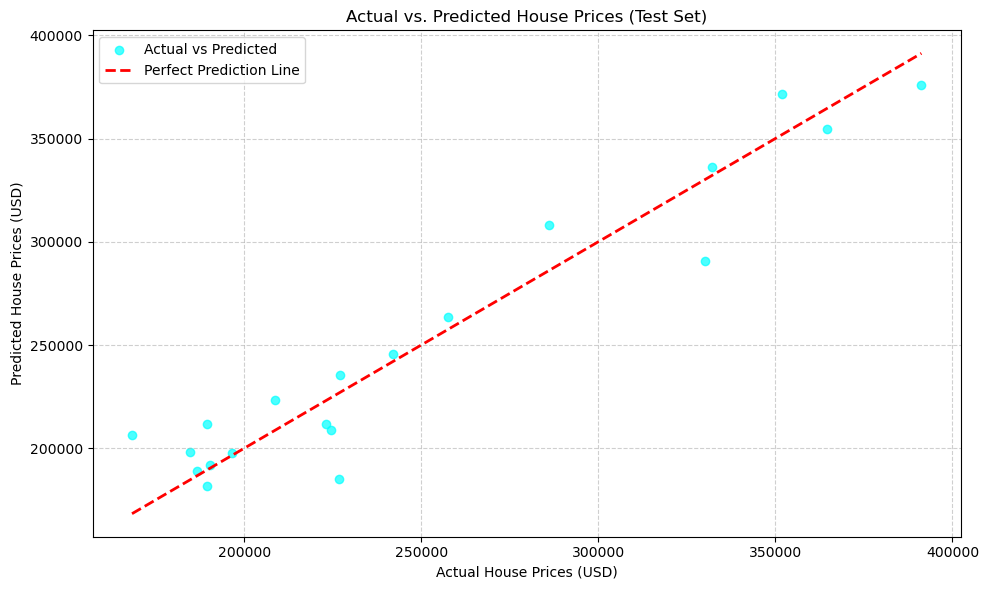

In [31]:
#Section 10 - Optional: Visualization of Predictions

# Plot line for simple Linear Regression (one feature)
# For multiple features, we can plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='cyan', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel("Actual House Prices (USD)")
plt.ylabel("Predicted House Prices (USD)")

plt.title("Actual vs. Predicted House Prices (Test Set)")

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



